<a href="https://colab.research.google.com/github/asujin/data-mining-project/blob/HEAD/summary_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xmltodict

In [2]:
import requests
import xmltodict
import time
import pandas as pd
import urllib.parse as up
import urllib as ul
import numpy as np
import math
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter.marker import Line
import importlib
from plotly.subplots import make_subplots
import pandas as pd
import json

# COVID 백신

In [3]:
# To import vaccine data

url_base = "https://api.odcloud.kr/api/15077756/v1/vaccine-stat"
url_serviceKey = 'ntjoxkSQoZ%2BmIHTV9H%2FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%3D%3D'
url_pages = "10000" #페이지당열갯수
url_base_date=''
url = url_base + "?page=1&perPage=" + url_pages + "&base_Date="+ url_base_date + "&serviceKey=" + url_serviceKey 
#https://api.odcloud.kr/api/15077756/v1/vaccine-stat?page=1&perPage=10&cond%5BbaseDate%3A%3AEQ%5D=2021-02-26&serviceKey=%7BntjoxkSQoZ%252BmIHTV9H%252FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%253D%253D%7D

In [4]:
req = requests.get(url).content

In [5]:
req

b'{"currentCount":2688,"data":[{"accumulatedFirstCnt":449535,"accumulatedSecondCnt":0,"baseDate":"2021-03-11 00:00:00","firstCnt":51100,"secondCnt":0,"sido":"\xec\xa0\x84\xea\xb5\xad","totalFirstCnt":500635,"totalSecondCnt":0},{"accumulatedFirstCnt":61232,"accumulatedSecondCnt":0,"baseDate":"2021-03-11 00:00:00","firstCnt":12595,"secondCnt":0,"sido":"\xec\x84\x9c\xec\x9a\xb8\xed\x8a\xb9\xeb\xb3\x84\xec\x8b\x9c","totalFirstCnt":73827,"totalSecondCnt":0},{"accumulatedFirstCnt":36734,"accumulatedSecondCnt":0,"baseDate":"2021-03-11 00:00:00","firstCnt":3311,"secondCnt":0,"sido":"\xeb\xb6\x80\xec\x82\xb0\xea\xb4\x91\xec\x97\xad\xec\x8b\x9c","totalFirstCnt":40045,"totalSecondCnt":0},{"accumulatedFirstCnt":23101,"accumulatedSecondCnt":0,"baseDate":"2021-03-11 00:00:00","firstCnt":2310,"secondCnt":0,"sido":"\xeb\x8c\x80\xea\xb5\xac\xea\xb4\x91\xec\x97\xad\xec\x8b\x9c","totalFirstCnt":25411,"totalSecondCnt":0},{"accumulatedFirstCnt":23879,"accumulatedSecondCnt":0,"baseDate":"2021-03-11 00:00:00

In [6]:
info = json.loads(req)
info
info=pd.DataFrame(info['data'])

In [7]:
##시간을 제외하고 날짜만 뽑아내기
info['baseDate']=pd.to_datetime(info['baseDate']).dt.date

In [8]:
# 'sido'에서 전국데이터만 필요하기 때문에 인덱스 뽑아내기
is_sido= info['sido']=='전국' 

In [9]:
info=info[is_sido]

In [10]:
info

,accumulatedFirstCnt,accumulatedSecondCnt,baseDate,firstCnt,secondCnt,sido,totalFirstCnt,totalSecondCnt
0,449535,0,2021-03-11,51100,0,전국,500635,0
18,503750,0,2021-03-12,42527,0,전국,546277,0
36,547974,0,2021-03-13,35684,0,전국,583658,0
54,584397,0,2021-03-14,3487,0,전국,587884,0
72,587884,0,2021-03-15,1074,0,전국,588958,0
...,...,...,...,...,...,...,...,...
2598,19444484,7145929,2021-08-02,27892,480,전국,19472376,7146409
2616,19473657,7146602,2021-08-03,473850,35955,전국,19947507,7182557
2634,19950651,7183130,2021-08-04,218941,106529,전국,20169592,7289659
2652,20171328,7290594,2021-08-05,164924,109665,전국,20336252,7400259


baseDate	string
통계 기준일자

sido	string
지역명칭

firstCnt	integer
당일 통계(1차 접종)

secondCnt	integer
당일 통계(2차 접종)

totalFirstCnt	integer
전체 누적 통계(1차 접종)

totalSecondCnt	integer
전체 누적 통계(2차 접종)

accumulatedFirstCnt	integer
전일까지의 누적 통계 (1차 접종)

accumulatedSecondCnt	integer
전일까지의 누적 통계 (2차 접종)

In [11]:
# 2/26일을 시작으로(1일로 쳤을 때) 49일은 4/15일이다. 따라서 4/14일은 48일째이고,
# 4/15일은 49일째로, 이때부터 R_V로 가는 집단이 생겨난다. 
# 4/14까지의 accumulated만을 고려

In [12]:
info=info[['accumulatedFirstCnt','firstCnt','baseDate']]

In [13]:
info = info.sort_values(by='baseDate') #diff()를 사용하기 위해서 날짜로 오름차순 정렬

In [14]:
info

,accumulatedFirstCnt,firstCnt,baseDate
0,449535,51100,2021-03-11
18,503750,42527,2021-03-12
36,547974,35684,2021-03-13
54,584397,3487,2021-03-14
72,587884,1074,2021-03-15
...,...,...,...
2598,19444484,27892,2021-08-02
2616,19473657,473850,2021-08-03
2634,19950651,218941,2021-08-04
2652,20171328,164924,2021-08-05


In [15]:
## index 차례로 정렬
info.reset_index(inplace=True) 

In [16]:
# 기존의 index열 삭제
info.drop(['index'], axis='columns', inplace=True)

In [17]:
info=info[1:]

# COVID 감염현황 Dataset

In [93]:
url_base = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"
url_serviceKey = 'ntjoxkSQoZ%2BmIHTV9H%2FajwmAKelzxFovhQWHJ6iftTjjhgkLbODfdUQcSssSUFxraKuWlnvcVXBHpJzuZ2Sm0A%3D%3D'
url_pages = "1000" #페이지당열갯수
url_start_date = "20210311" #시작날짜
url_end_date = "20210806" #끝날짜
url = url_base + "?serviceKey=" + url_serviceKey+ "&pageNo=1&numOfRows=" + url_pages + "&startCreateDt="+ url_start_date + "&endCreateDt=" + url_end_date

In [94]:
req = requests.get(url).content

In [95]:
xmlObject = xmltodict.parse(req)
dict_data = xmlObject['response']['body']['items']['item']

In [96]:
df = pd.DataFrame(dict_data)
df = df.astype({'decideCnt' : 'int', 'examCnt' : 'int', 'deathCnt' : 'int','clearCnt':'int', 'careCnt':'int','stateDt': 'object'})

In [97]:
df = df.drop_duplicates(['stateDt']) #중복제거

In [98]:
df

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt
0,1.7996803707,11951652,11524602,23241,182052,2021-08-06 09:43:45.386,2113,207406,427050,11317196,595,20210806,00:00,null
1,1.7898107421,11908436,11492947,22874,180719,2021-08-05 09:50:52.915,2109,205702,415489,11287245,594,20210805,00:00,null
2,1.7784726028,11864245,11466356,22697,179123,2021-08-04 09:49:14.864,2106,203926,397889,11262430,593,20210804,00:00,null
3,1.7703206768,11820016,11421716,22188,177909,2021-08-03 09:38:51.531,2104,202201,398300,11219515,592,20210803,00:00,2021-08-04 09:58:25.377
4,1.7654223809,11772604,11385434,22297,176605,2021-08-02 09:37:51.966,2099,201001,387170,11184433,591,20210802,00:00,2021-08-03 11:08:09.679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.3689198014,7084930,7013340,6578,87754,2021-03-15 09:51:09.37,1675,96007,71590,6917333,449,20210315,00:00,2021-04-20 14:47:28.958
145,1.3667877215,7066394,6996551,6551,87408,2021-03-14 09:42:57.64,1669,95628,69843,6900923,448,20210314,00:00,2021-04-20 14:47:44.94
146,1.3636674313,7046775,6978901,6877,86625,2021-03-13 09:36:41.886,1667,95169,67874,6883732,447,20210313,00:00,2021-04-20 14:48:06.227
147,1.3634807664,7012657,6943919,7274,85743,2021-03-12 09:49:58.077,1662,94679,68738,6849240,446,20210312,00:00,2021-04-20 14:48:36.524


In [99]:
df['baseDate']=df['stateDt']
df['baseDate'] = pd.to_datetime(df['baseDate']) #시계열지정

In [100]:
df=df[['baseDate','careCnt','clearCnt','deathCnt','decideCnt']]
df = df.sort_values(by='baseDate') #diff()를 사용하기 위해서 날짜로 오름차순 정렬
df.reset_index(inplace=True)
df.drop(['index'], axis='columns', inplace=True)

In [101]:
df

,baseDate,careCnt,clearCnt,deathCnt,decideCnt
0,2021-03-11,7864,84675,1652,94191
1,2021-03-12,7274,85743,1662,94679
2,2021-03-13,6877,86625,1667,95169
3,2021-03-14,6551,87408,1669,95628
4,2021-03-15,6578,87754,1675,96007
...,...,...,...,...,...
144,2021-08-02,22297,176605,2099,201001
145,2021-08-03,22188,177909,2104,202201
146,2021-08-04,22697,179123,2106,203926
147,2021-08-05,22874,180719,2109,205702


In [102]:
df['daily_H']=df['careCnt'].diff()
df['daily_R_H']=df['clearCnt'].diff()
df['daily_D']=df['deathCnt'].diff()
df['daily_X']=df['decideCnt'].diff()

In [103]:
df=df[1:]

In [104]:
df['baseDate']=pd.to_datetime(df['baseDate']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 1 to 148
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   accumulatedFirstCnt  148 non-null    int64 
 1   firstCnt             148 non-null    int64 
 2   baseDate             148 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 1 to 148
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   baseDate   148 non-null    object 
 1   careCnt    148 non-null    int64  
 2   clearCnt   148 non-null    int64  
 3   deathCnt   148 non-null    int64  
 4   decideCnt  148 non-null    int64  
 5   daily_H    148 non-null    float64
 6   daily_R_H  148 non-null    float64
 7   daily_D    148 non-null    float64
 8   daily_X    148 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 10.5+ KB


df의 baseDate와 info의 baseDate의 Dtype이 다르다.

In [107]:
##'baseDate를 기준으로 데이터 프레임을 합쳐준다

summary=pd.merge(df, info, on="baseDate", how="outer")

In [108]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt
0,2021-03-12,7274,85743,1662,94679,-590.0,1068.0,10.0,488.0,503750,42527
1,2021-03-13,6877,86625,1667,95169,-397.0,882.0,5.0,490.0,547974,35684
2,2021-03-14,6551,87408,1669,95628,-326.0,783.0,2.0,459.0,584397,3487
3,2021-03-15,6578,87754,1675,96007,27.0,346.0,6.0,379.0,587884,1074
4,2021-03-16,6437,88255,1678,96370,-141.0,501.0,3.0,363.0,590228,11922
...,...,...,...,...,...,...,...,...,...,...,...
143,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892
144,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850
145,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941
146,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924


##By data driven

careCnt: 누적치료중 (H)

clearCnt: 누적회복환자 (HR)

DeathCnt: 누적사망자 (HD)

DecideCnt: careCnt+ clearCnt+ DeathCnt => 누적 확진환자

daily (HR) : clarCnt(t)- clearCnt( t-1)

daily (HD): deathCnt(t) - deathCnt( t-1)

4/14일의 accumulatedFirstCnt를 보고

4/15일의 V(t)= 4월 14일의 accFirst + 4/15일의 firstCnt - xi * 4/14일의 accFirst

firstCnt: daily_vbar를 나타냄

3월 12일부터 한 이유는 3월 11일에 nan이 있기 때문


# Parameter

#time-varying reproduction / E (t) / I(t) 

## Rt구하기

In [109]:
## 감염재생산지수를 추정하기 위해서 감마분포를 사용한다.
## cori method 는 평균 4.8, 표준편차 2.3.
from scipy.stats import gamma
import seaborn as sns
import matplotlib.pyplot as plt
a=(4.8/2.3)*(4.8/2.3)
b=4.8/a
dat=gamma.rvs(a=a ,scale=b)
gamma.stats(dat, moments='mvsk')

(array(3.64304236), array(3.64304236), array(1.04784703), array(1.64697508))

In [110]:
## t is the location of data frame 'new'
## new is 'daily_decideCnt' 

def bin(t,new):
  result=[]
  #print(last)
  s=1
  while s <= t:
    ans=gamma.pdf(s,a=a,scale=b)*new[t-s]
    s=s+1
    result.append(ans)
    #print(result)
  med=sum(result)
  ans=new[t]/med

  return ans

In [111]:
new=summary['daily_X']
Rt_date=[]
for i in range(0,len(new)):
  Rt_date.append(bin(i,new))
len(Rt_date)
print(Rt_date)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in double_scalars



[inf, 36.246290907596745, 6.612587258977033, 2.4197171356319966, 1.485811587877307, 1.5180741855972801, 1.2744788650964172, 1.225864986969004, 1.1171165483631238, 1.0907371298389847, 0.9627348187982354, 0.7883394251786227, 0.9763984466986969, 1.0015932042106768, 1.1614165768390234, 1.2041733427520875, 1.1280376687858116, 0.8649553470861007, 0.9864437603534574, 1.1138146898081962, 1.2180806120223657, 1.2186533256444818, 1.1520200133555547, 1.1047325378379556, 0.9321636488434305, 0.9172889774208417, 1.2818693150650717, 1.3466738707658497, 1.2586808439680448, 1.2058010802468708, 1.0343972371530143, 0.947224229024611, 0.8568227978629924, 1.1584833933502785, 1.1201788330368823, 1.0756683401409448, 1.0318832950278496, 1.0315981842427997, 0.8072198440127745, 0.8315894214825721, 1.1287562692313637, 1.164265018668875, 1.2653920009607573, 1.2150571371139411, 0.9546476646703378, 0.7110631480533206, 0.7228481897535594, 1.1186363749593415, 1.037322623008467, 1.0287059653098443, 0.972275404892029, 0

In [112]:
summary['Rt']=Rt_date

##I(t)구하기

In [113]:
## I(t)=alpha * x(t-1) 여기서 alpha
I=[0]
alpha=1.1
for i in range(1, len(summary)):
  I.append( alpha* summary['daily_X'][i-1] )
print(I)

[0, 536.8000000000001, 539.0, 504.90000000000003, 416.90000000000003, 399.3, 515.9000000000001, 489.50000000000006, 509.30000000000007, 491.70000000000005, 501.6, 456.50000000000006, 380.6, 470.8, 473.00000000000006, 537.9000000000001, 555.5, 530.2, 420.20000000000005, 491.70000000000005, 556.6, 606.1, 612.7, 597.3000000000001, 596.2, 521.4000000000001, 524.7, 734.8000000000001, 770.0000000000001, 738.1, 744.7, 675.4000000000001, 645.7, 596.2, 804.1, 767.8000000000001, 740.3000000000001, 723.8000000000001, 738.1, 585.2, 603.9000000000001, 804.1, 808.5000000000001, 876.7, 863.5000000000001, 708.4000000000001, 548.9000000000001, 563.2, 844.8000000000001, 748.0000000000001, 727.1, 689.7, 666.6, 536.8000000000001, 595.1, 743.6, 631.4000000000001, 577.5, 771.1, 620.4000000000001, 509.30000000000007, 561.0, 699.6, 786.5000000000001, 821.7, 749.1, 671.0, 680.9000000000001, 580.8000000000001, 718.3000000000001, 710.6, 617.1, 732.6, 643.5, 583.0, 567.6, 768.9000000000001, 700.7, 645.7, 586.3000

In [114]:
len(I)

148

In [115]:
#latent period=epsilon 
epsilon=1/5

#time to build immunity
xi=1/49

#alpha
alpha=1.1

#recovery rate=gamma
recov=1/9

#Total population 
N= 51821669

# E(t) 구하기 

E-> I 로 넘어가는 날은 5일이 걸리므로 mean=5, std=2.3 인 감마분포를 따른다고 가정

In [116]:
a=(5/2.3)*(5/2.3)
b=5/a
dat=gamma.rvs(a=a ,scale=b)
gamma.stats(dat, moments='mvsk')

(array(2.64189381), array(2.64189381), array(1.23047365), array(2.2710981))

In [117]:
## gamma 분포의 weight 조정
med=[gamma.pdf(0,a=a,scale=b),gamma.pdf(1,a=a,scale=b) , gamma.pdf(2,a=a,scale=b),gamma.pdf(3,a=a,scale=b) ,
     gamma.pdf(4,a=a,scale=b) , gamma.pdf(5,a=a,scale=b),gamma.pdf(6,a=a,scale=b),
     gamma.pdf(7,a=a,scale=b) , gamma.pdf(8,a=a,scale=b), gamma.pdf(9,a=a,scale=b),
     gamma.pdf(10,a=a,scale=b)]

sum_med=sum(med)

W_0=med[0]/sum_med
W_1=med[1]/sum_med
W_2=med[2]/sum_med
W_3=med[3]/sum_med
W_4=med[4]/sum_med
W_5=med[5]/sum_med
W_6=med[6]/sum_med
W_7=med[7]/sum_med
W_8=med[8]/sum_med
W_9=med[9]/sum_med
W_10=med[10]/sum_med

Weights=[W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10]

In [118]:
sum(Weights)

0.9999999999999998

In [119]:
## t is the location of data frame 'new'
## new is 'daily_decideCnt' 
def W_bin(t,new):
  result=[]
  #print(last)
  s=1
  while s <= 10:
    ans=Weights[s]*new[t-s]
    #print(s)
    #print(new[t-s]) 
    s=s+1
    result.append(ans)
    #print(result)
  med=sum(result)
  #ans=new[t]/med

  return med

In [120]:
new=summary['daily_X']

In [121]:
# 10개가 쌓이기전까지는 구할수없으므로, 10번째이후부터 구할수있다.
E=[0,0,0,0,0,0,0,0,0,0]
for i in range(10,len(new)):
  E.append(W_bin(i,new))
#len(E)
print(E)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 438.94018308091506, 442.53496182789996, 440.9253483739397, 431.881912939062, 423.1617633256038, 420.0649977777007, 425.03016243474013, 438.33368425495075, 450.9899020605418, 454.3952483777302, 452.56996319449695, 456.0382934805987, 469.6053978336258, 488.1348732354104, 506.75062817062076, 519.4711002721866, 522.2852219497328, 520.5649999251251, 531.6717290009851, 557.601500658229, 589.3707174612383, 617.0318807671977, 632.7875585982094, 634.2004281259458, 626.5334191264254, 627.2418279020492, 638.0430749328358, 649.2757121079999, 657.6656996019316, 660.4772620637401, 650.2754407419607, 633.9953828275303, 629.4393191882167, 642.9996491961562, 668.2305335587773, 696.7503662285287, 708.8120286341921, 692.7222247365684, 661.3948532590948, 645.2327181410399, 645.1543486950138, 648.978006724597, 650.3194545662027, 642.7213268328902, 623.1954249648719, 602.5250057436655, 594.0648469579522, 591.2194877337092, 585.6447586340121, 588.7908981611787, 590.946118713209

In [122]:
summary['E']=E
summary['I']=I

In [123]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I
0,2021-03-12,7274,85743,1662,94679,-590.0,1068.0,10.0,488.0,503750,42527,inf,0.000000,0.0
1,2021-03-13,6877,86625,1667,95169,-397.0,882.0,5.0,490.0,547974,35684,36.246291,0.000000,536.8
2,2021-03-14,6551,87408,1669,95628,-326.0,783.0,2.0,459.0,584397,3487,6.612587,0.000000,539.0
3,2021-03-15,6578,87754,1675,96007,27.0,346.0,6.0,379.0,587884,1074,2.419717,0.000000,504.9
4,2021-03-16,6437,88255,1678,96370,-141.0,501.0,3.0,363.0,590228,11922,1.485812,0.000000,416.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2
144,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8
145,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0
146,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5


In [124]:
summary['delta_E']=summary['E'].diff()
summary['delta_I']=summary['I'].diff()

In [125]:
## 4월 14일의 데이터부터
summary=summary[33:]

In [126]:
summary.reset_index(inplace=True) 
summary.drop(['index'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5


In [128]:

Vt=[1240389] # 4 /14  까지 누적된 accumulatedFirstCnt : 전일까지 누적된 일
RV=[0]
for i in range(1,len(summary)):
  RV.append( xi*Vt[i-1])
  #Vt.append(Vt[0]+summary['firstCnt'][i] -(xi*Vt[i-1]))
  Vt.append(Vt[i-1]+summary['firstCnt'][i] -RV[i])
print(Vt)
print(RV)

[1240389, 1260594.9387755103, 1327528.511453561, 1402826.092852468, 1403361.9889167033, 1379580.9483265665, 1472660.235095412, 1572833.9445832607, 1671963.29265299, 1768456.592802929, 1890946.6419294, 1916699.8941349224, 1883723.569764822, 1987217.2316063563, 2122455.777900104, 2299869.3538613264, 2494900.24459885, 2703001.9130764245, 2687007.608727926, 2633731.7187538864, 2646902.091840542, 2655390.6818029797, 2606452.035235572, 2595224.136557295, 2581242.3786683707, 2540494.962777179, 2488651.126802135, 2446203.328295969, 2402309.8113919697, 2357691.0805472354, 2316713.9360462716, 2278982.0598004293, 2233741.2218453186, 2188159.666297455, 2155509.3465770986, 2123341.35991226, 2081790.8627711935, 2050488.3349595366, 2022405.6342460767, 1986065.0498737078, 1945750.110080367, 1977332.9241603594, 2014451.1910142296, 2060504.9422180206, 2675645.820948265, 3163267.804194219, 3262168.318394337, 3200303.454753636, 3520526.1393505004, 4014055.6671188576, 4313687.163708269, 4568228.731795855, 

In [129]:
summary['Vt']=Vt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:

summary['IR']= recov *(alpha-1)*summary['decideCnt']
summary['VR']=RV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
### Rv는 누적합으로 구해야함 
import itertools  #누적합을 구하기위한 함수

summary['acc_VR'] = list(itertools.accumulate(summary['VR']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I,Vt,IR,VR,acc_VR
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5,1.240389e+06,1237.933333,0.000000,0.000000e+00
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9,1.260595e+06,1245.688889,25314.061224,2.531406e+04
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3,1.327529e+06,1253.166667,25726.427322,5.104049e+04
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5,1.402826e+06,1260.477778,27092.418601,7.813291e+04
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5,1.403362e+06,1267.933333,28629.103936,1.067620e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7,7.599909e+06,2233.344444,157750.344307,1.118548e+07
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4,7.918658e+06,2246.677778,155100.174015,1.134058e+07
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8,7.975994e+06,2265.844444,161605.272505,1.150219e+07
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5,7.978143e+06,2285.577778,162775.389392,1.166496e+07


In [133]:

summary['S']= N - summary['clearCnt'] - summary['deathCnt'] -summary['Vt']-summary['acc_VR'] - summary['IR'] -summary['E'] -summary['I']-summary['careCnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I,Vt,IR,VR,acc_VR,S
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5,1.240389e+06,1237.933333,0.000000,0.000000e+00,5.046740e+07
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9,1.260595e+06,1245.688889,25314.061224,2.531406e+04,5.042097e+07
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3,1.327529e+06,1253.166667,25726.427322,5.104049e+04,5.032767e+07
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5,1.402826e+06,1260.477778,27092.418601,7.813291e+04,5.022463e+07
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5,1.403362e+06,1267.933333,28629.103936,1.067620e+05,5.019479e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7,7.599909e+06,2233.344444,157750.344307,1.118548e+07,3.282985e+07
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4,7.918658e+06,2246.677778,155100.174015,1.134058e+07,3.235504e+07
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8,7.975994e+06,2265.844444,161605.272505,1.150219e+07,3.213443e+07
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5,7.978143e+06,2285.577778,162775.389392,1.166496e+07,3.196720e+07


In [135]:
#summary=summary[1:]
#summary.reset_index(inplace=True)
#summary.drop(['index'], axis='columns', inplace=True)
#summary.drop(['level_0'], axis='columns', inplace=True)

In [136]:
##S(t)-S(t-1)
summary['daily_S'] = summary['S'].diff()
summary['daily_E'] = summary['E'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
## (I(t-1)/N )*(S(t-1)-daily_v(t))
k=[0]
for i in range(1, len(summary)):
    k.append((summary['I'][i-1])/N * ((summary['S'][i-1])-(summary['firstCnt'][i]))) 
summary['k']=k

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
summary


,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I,Vt,IR,VR,acc_VR,S,daily_S,daily_E,k
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5,1.240389e+06,1237.933333,0.000000,0.000000e+00,5.046740e+07,NaN,NaN,0.000000
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9,1.260595e+06,1245.688889,25314.061224,2.531406e+04,5.042097e+07,-46425.988547,-7.667009,580.095625
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3,1.327529e+06,1253.166667,25726.427322,5.104049e+04,5.032767e+07,-93304.886187,0.708409,780.928060
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5,1.402826e+06,1260.477778,27092.418601,7.813291e+04,5.022463e+07,-103038.612358,10.801247,744.147540
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5,1.403362e+06,1267.933333,28629.103936,1.067620e+05,5.019479e+07,-29838.188193,11.232637,717.068788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7,7.599909e+06,2233.344444,157750.344307,1.118548e+07,3.282985e+07,-29031.737536,14.904202,1072.516144
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4,7.918658e+06,2246.677778,155100.174015,1.134058e+07,3.235504e+07,-474802.495774,-14.437560,990.378786
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8,7.975994e+06,2265.844444,161605.272505,1.150219e+07,3.213443e+07,-220612.589120,-52.777546,830.848400
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5,7.978143e+06,2285.577778,162775.389392,1.166496e+07,3.196720e+07,-167232.074987,-65.158346,814.326335


In [139]:
summary['Beta_S']= - ( summary['daily_S'] + summary['firstCnt'] ) / summary['k'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:


Beta_E=[0]
for i in range(1, len(summary)):
    Beta_E.append((summary['daily_E'][i]+ (epsilon * summary['E'][i-1])) /summary['k'][i]) 


In [141]:
summary['Beta_E']=Beta_E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
summary
summary.to_excel("summary.xls")

In [143]:
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I,Vt,IR,VR,acc_VR,S,daily_S,daily_E,k,Beta_S,Beta_E
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5,1.240389e+06,1237.933333,0.000000,0.000000e+00,5.046740e+07,NaN,NaN,0.000000,NaN,0.000000
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9,1.260595e+06,1245.688889,25314.061224,2.531406e+04,5.042097e+07,-46425.988547,-7.667009,580.095625,1.561792,0.205437
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3,1.327529e+06,1253.166667,25726.427322,5.104049e+04,5.032767e+07,-93304.886187,0.708409,780.928060,0.825795,0.161366
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5,1.402826e+06,1260.477778,27092.418601,7.813291e+04,5.022463e+07,-103038.612358,10.801247,744.147540,0.871618,0.183095
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5,1.403362e+06,1267.933333,28629.103936,1.067620e+05,5.019479e+07,-29838.188193,11.232637,717.068788,0.938806,0.193623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7,7.599909e+06,2233.344444,157750.344307,1.118548e+07,3.282985e+07,-29031.737536,14.904202,1072.516144,1.062676,0.311898
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4,7.918658e+06,2246.677778,155100.174015,1.134058e+07,3.235504e+07,-474802.495774,-14.437560,990.378786,0.961749,0.311149
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8,7.975994e+06,2265.844444,161605.272505,1.150219e+07,3.213443e+07,-220612.589120,-52.777546,830.848400,2.011906,0.321271
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5,7.978143e+06,2285.577778,162775.389392,1.166496e+07,3.196720e+07,-167232.074987,-65.158346,814.326335,2.834337,0.299623


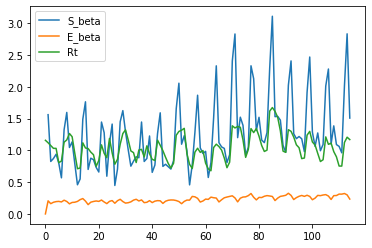

In [144]:
plt.plot(summary['Beta_S'], label="S_beta")
plt.plot(summary['Beta_E'], label="E_beta")
plt.plot(summary['Rt'], label="Rt")
plt.legend()
plt.show()

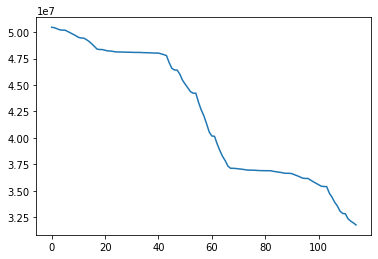

In [145]:
plt.plot(summary['S'])

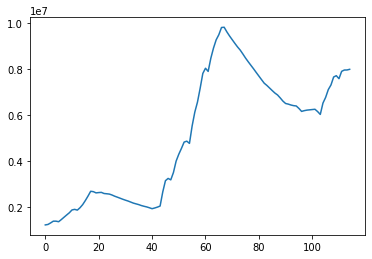

In [146]:
plt.plot(summary['Vt'])

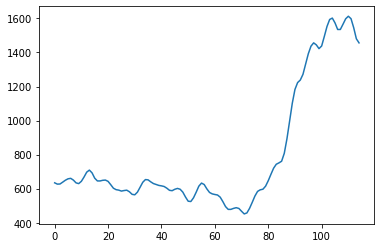

In [147]:
plt.plot(summary['E'])

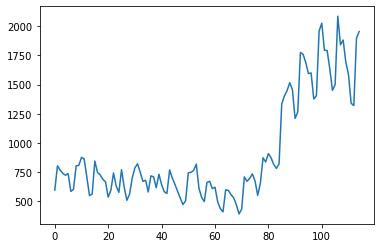

In [148]:
plt.plot(summary['I'])

In [149]:
summary.to_excel('summary.xls')

# Transition matrix로 구하기

In [150]:
##original data
summary

,baseDate,careCnt,clearCnt,deathCnt,decideCnt,daily_H,daily_R_H,daily_D,daily_X,accumulatedFirstCnt,firstCnt,Rt,E,I,delta_E,delta_I,Vt,IR,VR,acc_VR,S,daily_S,daily_E,k,Beta_S,Beta_E
0,2021-04-14,7649,101983,1782,111414,73.0,651.0,7.0,731.0,1195676,43390,1.158483,634.200428,596.2,1.412870,-49.5,1.240389e+06,1237.933333,0.000000,0.000000e+00,5.046740e+07,NaN,NaN,0.000000,NaN,0.000000
1,2021-04-15,7811,102513,1788,112112,162.0,530.0,6.0,698.0,1240389,45520,1.120179,626.533419,804.1,-7.667009,207.9,1.260595e+06,1245.688889,25314.061224,2.531406e+04,5.042097e+07,-46425.988547,-7.667009,580.095625,1.561792,0.205437
2,2021-04-16,7933,103062,1790,112785,122.0,549.0,2.0,673.0,1286993,92660,1.075668,627.241828,767.8,0.708409,-36.3,1.327529e+06,1253.166667,25726.427322,5.104049e+04,5.032767e+07,-93304.886187,0.708409,780.928060,0.825795,0.161366
3,2021-04-17,8055,103594,1794,113443,122.0,532.0,4.0,658.0,1380579,102390,1.031883,638.043075,740.3,10.801247,-27.5,1.402826e+06,1260.477778,27092.418601,7.813291e+04,5.022463e+07,-103038.612358,10.801247,744.147540,0.871618,0.183095
4,2021-04-18,8311,104006,1797,114114,256.0,412.0,3.0,671.0,1483338,29165,1.031598,649.275712,723.8,11.232637,-16.5,1.403362e+06,1267.933333,28629.103936,1.067620e+05,5.019479e+07,-29838.188193,11.232637,717.068788,0.938806,0.193623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2021-08-02,22297,176605,2099,201001,286.0,931.0,1.0,1218.0,19444484,27892,0.753435,1612.963240,1586.2,14.904202,-106.7,7.599909e+06,2233.344444,157750.344307,1.118548e+07,3.282985e+07,-29031.737536,14.904202,1072.516144,1.062676,0.311898
111,2021-08-03,22188,177909,2104,202201,-109.0,1304.0,5.0,1200.0,19473657,473850,0.752868,1598.525680,1339.8,-14.437560,-246.4,7.918658e+06,2246.677778,155100.174015,1.134058e+07,3.235504e+07,-474802.495774,-14.437560,990.378786,0.961749,0.311149
112,2021-08-04,22697,179123,2106,203926,509.0,1214.0,2.0,1725.0,19950651,218941,1.123993,1545.748134,1320.0,-52.777546,-19.8,7.975994e+06,2265.844444,161605.272505,1.150219e+07,3.213443e+07,-220612.589120,-52.777546,830.848400,2.011906,0.321271
113,2021-08-05,22874,180719,2109,205702,177.0,1596.0,3.0,1776.0,20171328,164924,1.207202,1480.589788,1897.5,-65.158346,577.5,7.978143e+06,2285.577778,162775.389392,1.166496e+07,3.196720e+07,-167232.074987,-65.158346,814.326335,2.834337,0.299623


In [151]:
## 4/15 까지의 데이터를 씀
summary2=summary[1:]

In [152]:
summary2.reset_index(inplace=True)
summary2.drop(['index'], axis='columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
summary2.to_excel('summary2.xls')

# 1. Beta_S

In [154]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Sval 은 1- I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.


estimated_Sval=[]
for i in range(1, len(summary2)):
  estimated_Sval.append( (1-((summary2['I'][i-1]/N)*summary2['Beta_S'][i] ) ))

firstSval = estimated_Sval[0]*summary2['S'][0] - estimated_Sval[0] * summary2['firstCnt'][1]
S_sbetaval=[summary2['S'][0], firstSval]

for i in range(2, len(summary2)):
  S_sbetaval.append(estimated_Sval[i-1]* S_sbetaval[i-1] - estimated_Sval[i-1] * summary2['firstCnt'][i])

print(S_sbetaval)

[50420971.67769198, 50327666.79150543, 50224628.17914729, 50194789.99095456, 50189370.38985595, 50067731.378293484, 49936755.75789259, 49804600.671283826, 49673179.97179191, 49513723.48923968, 49448716.302799754, 49442198.33852265, 49299891.08797136, 49123322.34444192, 48901655.51625785, 48659133.13394852, 48399502.145651296, 48359753.988659926, 48357721.32498987, 48290391.712006494, 48227162.426797256, 48221201.2194387, 48178826.04626416, 48139192.00273449, 48126502.71079692, 48126179.12021296, 48117431.39832573, 48110717.03477895, 48105462.49789951, 48097484.13733006, 48087196.5990717, 48085354.71022292, 48084772.66846235, 48072207.04579362, 48059826.71487802, 48057264.79644245, 48045532.23797433, 48031193.6433404, 48025559.09588862, 48024897.99421929, 47953148.51161201, 47874994.94455494, 47786997.132611364, 47129282.01487475, 46586562.77232425, 46422675.91869229, 46417595.388079815, 46031667.0883189, 45465602.32517163, 45083147.625213385, 44739866.37881866, 44371316.00630703, 44232

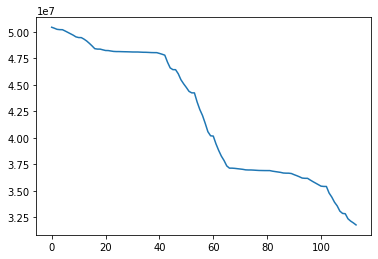

In [155]:
plt.plot(S_sbetaval)

In [156]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Eval 은  I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.

#Eval
estimated_Eval=[]
for i in range(1, len(summary2)):
  estimated_Eval.append( ((summary2['I'][i-1] / N)*summary2['Beta_S'][i] ) )

firstEval = ( estimated_Eval[0]*summary2['S'][0] ) + ((1-epsilon) * summary2['E'][0]) - (estimated_Eval[0] * summary2['firstCnt'][1])
E_sbetaval=[summary2['E'][0], firstEval]

for i in range(2, len(summary2)):
  E_sbetaval.append(estimated_Eval[i-1]* S_sbetaval[i-1] + ( (1-epsilon)* E_sbetaval[i-1] )- estimated_Eval[i-1] * summary2['firstCnt'][i])

print(E_sbetaval)

[626.5334191264254, 1146.1129218487179, 1565.50269562439, 1925.5903492246937, 2101.073377991706, 2085.870264859986, 2416.3166127861477, 2860.1398989815266, 3093.8114110958577, 3350.531681107044, 3343.6117848021263, 3052.8537049526944, 2812.533515260416, 3024.770341647305, 3357.644457386047, 3241.497875241328, 3206.186597417107, 3144.106269303708, 2986.948685498535, 2799.1719317746156, 2961.6227546656723, 3077.5055622865434, 2872.177624374404, 2949.7856291664834, 3118.1204409004804, 2815.086936685567, 2658.791436571876, 2812.396696038743, 3096.454236273626, 3316.52395846618, 3392.7574251392307, 3287.0947888780693, 3206.7175916737565, 3124.996742067238, 3058.328309253852, 3225.581082976659, 3130.0233344996377, 3078.6133015291416, 3164.43809300256, 2975.6521437359233, 2838.0043222565355, 2951.970514878344, 3194.388355470964, 3078.6284209920123, 2955.1452872933473, 2793.9698617930435, 2605.706501910605, 2477.864962443823, 2670.0551172272276, 3039.744052024258, 3137.04163634306, 3299.005820

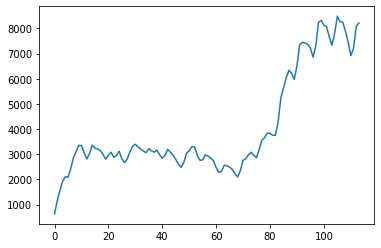

In [157]:
plt.plot(E_sbetaval)

In [158]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Eval 은  I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.

firstIval = ( epsilon*summary2['E'][0] ) + ((1-recov) * summary2['I'][0]) - (1-recov)*summary2['daily_X'][1] 

I_sbetaval=[summary2['I'][0], firstIval]

for i in range(2, len(summary2)):
  I_sbetaval.append( (epsilon* E_sbetaval[i-1] )+ ( (1-recov)* I_sbetaval[i-1] )- ((1-recov)*summary2['daily_X'][i] ))
  #print((1-recov)*summary2['daily_X'][i] )
  #print(( (1-recov)* I_sbetaval[i-1] ))
  #print(epsilon* E_sbetaval[i-1] )

print(I_sbetaval)

[804.1, 241.84001715861848, -140.69740037815103, -408.4082612112562, -450.80038456506674, -468.49677734838474, -649.0453046710113, -746.9991704836692, -800.4157273002895, -790.4961420477524, -605.0013455988155, -312.6121724607441, -122.41785675234473, -228.97583628333427, -203.02445281128053, -96.49284435503978, 5.194824510452577, 107.18827460382374, 290.32194239747383, 374.5647970085726, 291.89198369587666, 341.5618697739137, 452.44499670078756, 353.49774416446974, 402.84400953504763, 570.152096655694, 616.4859176977304, 514.4124363790245, 384.1792826557704, 296.7835429487434, 321.77905209211906, 422.3550868875076, 482.62347945339843, 601.008833404439, 578.7849781062822, 551.918975723021, 637.044195015795, 600.2661735806341, 629.2925923775033, 721.1477007138483, 777.4839404928276, 637.3643671115983, 590.7179848526453, 642.1825465187666, 712.7768366595283, 798.8306900449168, 886.6434746207569, 901.2688333783494, 694.923066602853, 546.3870826479817, 475.84843942527993, 389.0513845355276

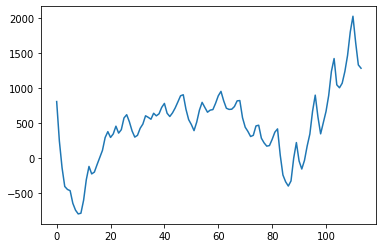

In [159]:
plt.plot(I_sbetaval)

In [160]:
# R

firstIRval = ( recov*summary2['I'][0] ) +  summary2['IR'][0]

IR_sbetaval=[summary2['IR'][0], firstIRval]

for i in range(2, len(summary2)):
  IR_sbetaval.append( (recov * I_sbetaval[i-1]  )+ IR_sbetaval[i-1]- recov *summary2['daily_X'][i] )
  #print((1-recov)*summary2['daily_X'][i] )
  #print(( (1-recov)* I_sbetaval[i-1] ))
  #print(epsilon* E_sbetaval[i-1] )

print(IR_sbetaval)

[1245.68888888889, 1335.0333333333344, 1288.7933352398477, 1198.604735197831, 1094.1149283965804, 983.0259967782397, 849.7485770728637, 695.9657654427514, 524.410302055677, 348.2529990223115, 188.86453879478347, 66.1977226171373, -25.425852100723148, -124.36116951765034, -225.35848466024305, -321.3612016392742, -401.7492954565008, -468.5054260664505, -510.817839999359, -538.6709575107508, -572.1637578431316, -603.5090929880341, -623.8911074575993, -651.5083300464007, -674.8974695836819, -681.5814685242322, -674.897902229155, -677.0661335960738, -699.3536406650711, -739.6670537033189, -782.3577711534584, -814.3823209210007, -836.2317557112776, -841.2735913275667, -847.0503876159623, -854.5187233819311, -855.5277260793732, -858.7450377442849, -857.0487962353255, -846.0162859711586, -823.2220970029533, -814.5016591704169, -814.4611739357949, -814.0480645077232, -801.9166704500824, -775.9414663768014, -734.9602785940328, -687.4443369695043, -662.5255777052432, -660.9785703049262, -677.4911

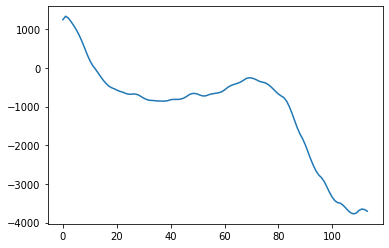

In [161]:
plt.plot(IR_sbetaval)

#Beta_E

In [162]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Sval 은 1- I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.


estimated_Eval=[]
for i in range(1, len(summary2)):
  estimated_Eval.append( (1-((summary2['I'][i-1]/N)*summary2['Beta_E'][i] ) ))

firstSval = estimated_Eval[0]*summary2['S'][0] - estimated_Eval[0] * summary2['firstCnt'][1]
S_Ebetaval=[summary2['S'][0], firstSval]

for i in range(2, len(summary2)):
  S_Ebetaval.append(estimated_Eval[i-1]* S_Ebetaval[i-1] - estimated_Eval[i-1] * summary2['firstCnt'][i])

print(S_Ebetaval)

[50420971.67769198, 50328185.66259938, 50225659.41157919, 50196355.567474626, 50191358.31803243, 50069989.967995964, 49939640.06885183, 49808298.28723272, 49677561.03512031, 49518840.57458805, 49454342.727855235, 49448040.54346183, 49305952.11378351, 49130032.42567595, 48909196.193890885, 48667113.059061, 48407966.06962331, 48368664.191843614, 48366972.03063187, 48299929.541408844, 48237313.50148523, 48231956.51093327, 48189879.44107858, 48150781.446841076, 48138737.750540964, 48138614.44487257, 48130153.50048259, 48124015.68561242, 48119506.35657369, 48112256.856662884, 48102580.30639174, 48101166.65553968, 48101010.70620321, 48088861.31325243, 48076910.433517255, 48075008.855920196, 48063707.8442845, 48049823.15603776, 48044770.67536962, 48044432.51776404, 47973020.96087297, 47895436.20491003, 47808163.17568766, 47150855.292453416, 46608502.31901424, 46444921.07004371, 46440095.61675576, 46054458.19123688, 45488993.91091278, 45107357.369406976, 44764677.958794944, 44396790.32683329, 

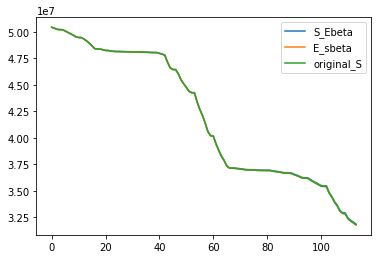

In [163]:
plt.plot(S_Ebetaval,label="S_Ebeta")
plt.plot(S_sbetaval, label="E_sbeta")
plt.plot(summary2['S'],label="original_S")
plt.legend()
plt.show()

In [164]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Eval 은  I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.

#Eval
estimated_Eval=[]
for i in range(1, len(summary2)):
  estimated_Eval.append( ((summary2['I'][i-1] / N)*summary2['Beta_E'][i] ) )

firstEval = ( estimated_Eval[0]*summary2['S'][0] ) + ((1-epsilon) * summary2['E'][0]) - (estimated_Eval[0] * summary2['firstCnt'][1])
E_Ebetaval=[summary2['E'][0], firstEval]

for i in range(2, len(summary2)):
  E_Ebetaval.append(estimated_Eval[i-1]* S_Ebetaval[i-1] + ( (1-epsilon)* E_Ebetaval[i-1] )- estimated_Eval[i-1] * summary2['firstCnt'][i])

print(E_Ebetaval)

[626.5334191264254, 627.2418279020492, 638.0444825106545, 649.2796905715088, 657.6731946585925, 660.4885921925495, 650.2900178899415, 634.013633424326, 629.4630191511914, 643.0309475754285, 668.2714908725724, 696.8015861038634, 708.8709472058748, 692.7848653218306, 661.4596773248592, 645.3025717469081, 645.231495090529, 649.0629757615241, 650.4115923560252, 642.8184969100048, 623.2947211376692, 602.6263288681619, 594.1709177872299, 591.3309717326839, 585.7610775045782, 588.9145303935246, 591.0760142966453, 581.6756816132828, 566.6695840099962, 563.8355780189861, 579.6187335595649, 608.3458389114335, 637.6260075939366, 653.4937568569773, 651.6747406614239, 639.9173895904535, 629.9455473714467, 624.644684633906, 619.196415854958, 616.5147382623745, 612.7686816765588, 602.9709082791816, 590.4059489909324, 588.2079934381076, 596.5398339350197, 601.4808376758157, 596.6379580958117, 579.7358853566566, 551.0690323863626, 526.396731716562, 524.5279974033889, 546.2543595748288, 579.177296965202

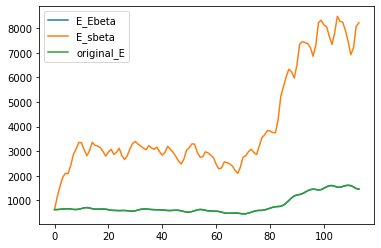

In [165]:
plt.plot(E_Ebetaval,label="E_Ebeta")
plt.plot(E_sbetaval,label="E_sbeta")
plt.plot(summary2['E'], label="original_E")
plt.legend()
plt.show()

In [166]:
# S, E, I , R을 구하기 위해 사용하는 데이터: 'firstCnt', 'Beta_S', 'daily_X', 'recov'

#estimated_Eval 은  I(t - 1) / N * B(t) 로 공통
#후에 E(t)를 추정하는데에도 쓰임
#Beta_E로 바꾸고 싶으면 Beta_S부분만 바꾸면 된다.

firstIval = ( epsilon*summary2['E'][0] ) + ((1-recov) * summary2['I'][0]) - (1-recov)*summary2['daily_X'][1] 

I_Ebetaval=[summary2['I'][0], firstIval]
#I_Ebetaval=[9000, firstIval]

for i in range(2, len(summary2)):
  I_Ebetaval.append( (epsilon* E_Ebetaval[i-1] )+ ( (1-recov)* I_Ebetaval[i-1] )- ((1-recov)*summary2['daily_X'][i] ))
  #print(summary2['daily_X'][i] )
  #print((I_Ebetaval[i-1] ))
  #print(E_Ebetaval[i-1] )

print(I_Ebetaval)

[804.1, 241.84001715861848, -244.47161916748473, -686.1436538689666, -952.9384208803351, -1203.5217351841347, -1587.4771572807208, -1934.3661362270966, -2301.078283294776, -2617.288092431785, -2770.3165593131675, -2772.404865659412, -2780.110674476482, -3012.1019656490307, -3143.311440845883, -3249.3182341758134, -3316.5556938068967, -3357.669873254691, -3288.5606255185317, -3273.9715708786007, -3382.522141398977, -3392.24962590489, -3361.4744016973805, -3492.2541735068917, -3487.2930709929224, -3394.21940315946, -3352.6343411741486, -3427.2375448510247, -3565.65379243381, -3720.1361209169427, -3799.3538807668183, -3803.501925080814, -3809.4436545117696, -3727.980269158341, -3763.5059323249075, -3789.225880600966, -3738.88397150499, -3789.463309641257, -3763.4828938654473, -3692.5899558205165, -3617.665901965762, -3714.4826209675875, -3747.3903703153524, -3734.7102504821264, -3675.8786239631577, -3573.9174767358027, -3438.741589563328, -3345.3315991037957, -3459.4586887987093, -3570.19

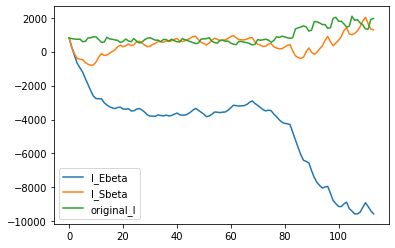

In [167]:
plt.plot(I_Ebetaval, label="I_Ebeta")
plt.plot(I_sbetaval, label="I_Sbeta")
plt.plot(summary2['I'], label="original_I")
plt.legend()
plt.show()


## other parameters o estimate ( rho / delta)

In [ ]:
# Delta
